# Final Project

**Our main business goal is to study the assortment of the store:**

- What are our clients buying
- Is there a difference between purchasing behavior of clients
- Are products bringing different revenue and should we keep all of them in inventory

Link to presentation: https://docs.google.com/presentation/d/10WyVhODeIENwzO7P1fAPw4fsTQNpLbriciNBERMnxZs/edit?usp=sharing

Tableau dashboard: https://public.tableau.com/views/FinalProject_16748054090120/RFMCombined?:language=es-ES&publish=yes&:display_count=n&:origin=viz_share_link

### Decomposition

In [1]:
import pandas as pd
import seaborn as sns
import datetime 
from datetime import date
import time
from scipy import stats as st
import numpy as np
import math as mth
import datetime as dt
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly as py
import plotly.express as px
import plotly.offline as pyoff
import nltk
from nltk.corpus import stopwords
from IPython.core.display import HTML as Center
from statsmodels.stats.proportion import proportions_ztest


In [2]:
try:
    data = pd.read_csv('/Users/tzipimeyer/Documents/Final Project/ecommerce_dataset_us.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [4]:
# Renaming columns to all lowercase

data = data.rename(columns=str.lower)

In [5]:
# Converting date column to datetime

data['invoicedate'] = pd.to_datetime(data['invoicedate'], format = '%m/%d/%Y %H:%M')

In [6]:
# Checking min and max values for date

data['invoicedate'].min()

Timestamp('2018-11-29 08:26:00')

In [7]:
data['invoicedate'].max()

Timestamp('2019-12-07 12:50:00')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    541909 non-null  object        
 1   stockcode    541909 non-null  object        
 2   description  540455 non-null  object        
 3   quantity     541909 non-null  int64         
 4   invoicedate  541909 non-null  datetime64[ns]
 5   unitprice    541909 non-null  float64       
 6   customerid   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


In [9]:
data.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0


In [10]:
data.isna().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135080
dtype: int64

In [11]:
# Revising % of missing values in description

data['description'].isna().sum()/len(data)

0.002683107311375157

In [12]:
# Revising % of missing values in customerid

data['customerid'].isna().sum()/len(data)

0.249266943342886

In [13]:
data[data['description'].isna()]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,NaN
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,NaN
1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,NaN
1972,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,NaN
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,NaN
...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2019-12-05 18:26:00,0.0,NaN
535326,581203,23406,NaN,15,2019-12-05 18:31:00,0.0,NaN
535332,581209,21620,NaN,6,2019-12-05 18:35:00,0.0,NaN
536981,581234,72817,NaN,27,2019-12-06 10:33:00,0.0,NaN


In [14]:
# Checking amount of duplicated rows

data.duplicated().sum()

5268

In [15]:
data[data.duplicated()]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2018-11-29 11:45:00,1.25,17908.0
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2018-11-29 11:45:00,2.10,17908.0
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2018-11-29 11:45:00,2.95,17908.0
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2018-11-29 11:45:00,4.95,17908.0
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2018-11-29 11:49:00,2.95,17920.0
...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2019-12-07 11:34:00,0.39,14446.0
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2019-12-07 11:34:00,2.49,14446.0
541692,581538,22992,REVOLVER WOODEN RULER,1,2019-12-07 11:34:00,1.95,14446.0
541699,581538,22694,WICKER STAR,1,2019-12-07 11:34:00,2.10,14446.0


- There is uncertainty regarding the duplicated data: it could be a double purchase, or it was duplictated by error. Therefore, I will not remove the duplicates

### Clients Analysis

In [16]:
data['invoicedate'].max()

Timestamp('2019-12-07 12:50:00')

In [17]:
# determine RFM value of clients

NOW = dt.datetime(2019, 12, 8)
NOW

datetime.datetime(2019, 12, 8, 0, 0)

In [18]:
rfm_clients = data.groupby(['customerid']).agg({'invoicedate': lambda x: (NOW - x.max()).days, 'invoiceno': 'nunique', 'unitprice': 'sum'}).reset_index()
rfm_clients = rfm_clients.rename(columns = {'invoicedate': 'recency', 'invoiceno': 'frequency', 'unitprice': 'monetary'})
rfm_clients

,customerid,recency,frequency,monetary
0,12346.0,325,2,2.08
1,12347.0,2,7,481.21
2,12348.0,75,4,178.71
3,12349.0,18,1,605.10
4,12350.0,310,1,65.30
...,...,...,...,...
4367,18280.0,277,1,47.65
4368,18281.0,180,1,39.36
4369,18282.0,7,3,62.68
4370,18283.0,3,16,1220.93


In [19]:
def rfm_clients_histograms(column):
    plt.figure(figsize=(10,3))
    sns.histplot(data=rfm_clients, x=column).set(title=(column))
    plt.xticks(rotation=70)
    plt.show()
 

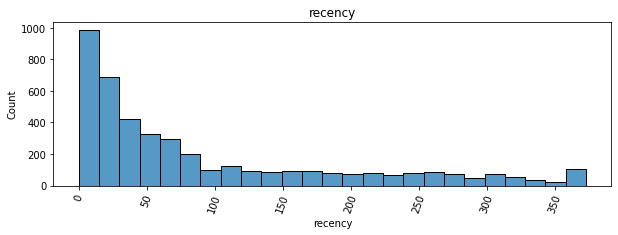

In [20]:
rfm_clients_histograms('recency')

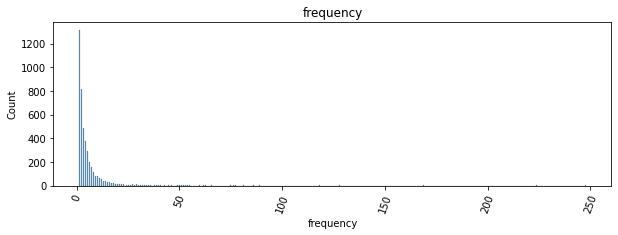

In [21]:
rfm_clients_histograms('frequency')

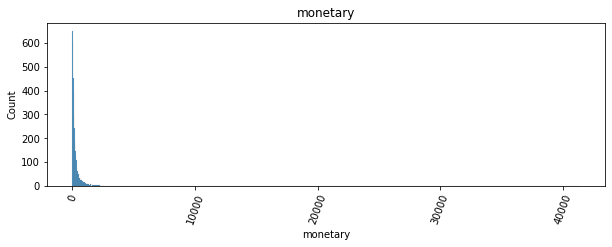

In [22]:
rfm_clients_histograms('monetary')

In [23]:
# Categorizing the RFM values

rfm_clients['R'] = pd.qcut(rfm_clients.recency, q=3, labels=["good", "medium", "bad"])
rfm_clients['F'] = pd.qcut(rfm_clients.frequency, q=3, labels=["bad", "medium", "good"])
rfm_clients['M'] = pd.qcut(rfm_clients.monetary, q=3, labels=["bad", "medium", "good"])
rfm_clients

,customerid,recency,frequency,monetary,R,F,M
0,12346.0,325,2,2.08,bad,bad,bad
1,12347.0,2,7,481.21,good,good,good
2,12348.0,75,4,178.71,medium,medium,medium
3,12349.0,18,1,605.10,good,bad,good
4,12350.0,310,1,65.30,bad,bad,bad
...,...,...,...,...,...,...,...
4367,18280.0,277,1,47.65,bad,bad,bad
4368,18281.0,180,1,39.36,bad,bad,bad
4369,18282.0,7,3,62.68,good,medium,bad
4370,18283.0,3,16,1220.93,good,good,good


In [24]:
# Function that will create points segments for each RFM category

def segment(row):
    R = row['R']
    F = row['F']
    M = row['M']
    segment = 0
    if R == 'bad':
        segment += 1
    if R == 'medium':
        segment += 2
    if R == 'good':
        segment += 3
    if F == 'bad':
        segment += 1
    if F == 'medium':
        segment += 2
    if F == 'good':
        segment += 3
    elif M == 'bad':
        segment += 1
    if M == 'medium':
        segment += 2
    if M == 'good':
        segment += 3
    return segment
  

In [25]:
# Applying the segment function to 'segment' column 

rfm_clients['segment'] = rfm_clients.apply(segment, axis=1)
rfm_clients.head()

,customerid,recency,frequency,monetary,R,F,M,segment
0,12346.0,325,2,2.08,bad,bad,bad,3
1,12347.0,2,7,481.21,good,good,good,9
2,12348.0,75,4,178.71,medium,medium,medium,6
3,12349.0,18,1,605.10,good,bad,good,7
4,12350.0,310,1,65.30,bad,bad,bad,3


In [26]:
# Viewing amount of clients in each segment (9 is the best kind of client)

segments = rfm_clients['segment'].value_counts().reset_index()
segments = segments.rename(columns = {'index':'segment', 'segment': 'total'})
segments = segments.sort_values(by='segment', ascending=False)

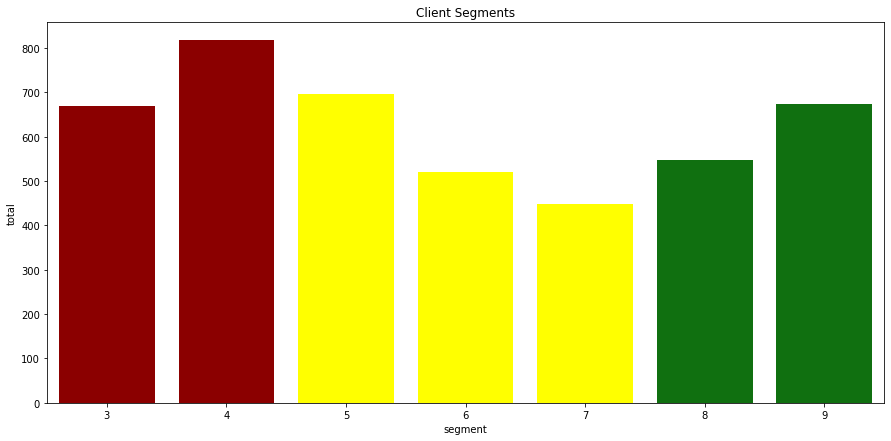

In [27]:
plt.figure(figsize=(15,7))
segment_plot = sns.barplot(data=segments, x='segment', y='total', color='green')
segment_plot.patches[0].set_facecolor('darkred')
segment_plot.patches[1].set_facecolor('darkred')
segment_plot.patches[2].set_facecolor('yellow')
segment_plot.patches[3].set_facecolor('yellow')
segment_plot.patches[4].set_facecolor('yellow')
plt.title('Client Segments')
plt.show()

- 7 Segments have been created, in which segment 3 is the lowest tier, and segment 9 is the highest tier of customers. 

- Points are given based on all 3 factors of RFM: recency, frequency and monetary value of clients.

**Marketing strategies:**

- Segments 3 and 4: Lowest value customers --> Send occasional emails to increase their top of mind of our store.
- Segments 5 - 7: Medium value customers --> Contact for new product introductions and offer incentives to increase purchases.
- Segments 8 - 9: Best customers --> Introduce a loyalty program to reward these clients with discounts and free things. Contact for new product introductions.




In [28]:
# Checking amount of cancelled/lost items

cancelled = data[(data['invoiceno'].str.contains('C'))|(data['quantity'] < 0)].sort_values(by='quantity') 
cancelled['quantity'] = abs(cancelled['quantity'])
cancelled

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2019-12-07 09:27:00,2.08,16446.0
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:17:00,1.04,12346.0
225529,556690,23005,printing smudges/thrown away,9600,2019-06-12 10:37:00,0.00,NaN
225530,556691,23005,printing smudges/thrown away,9600,2019-06-12 10:37:00,0.00,NaN
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,9360,2018-11-30 14:23:00,0.03,15838.0
...,...,...,...,...,...,...,...
240697,C558112,22796,PHOTO FRAME 3 CLASSIC HANGING,1,2019-06-24 16:08:00,9.95,17114.0
240696,C558112,23091,ZINC HERB GARDEN CONTAINER,1,2019-06-24 16:08:00,6.25,17114.0
240694,C558112,82486,WOOD S/3 CABINET ANT WHITE FINISH,1,2019-06-24 16:08:00,8.95,17114.0
242447,C558347,S,SAMPLES,1,2019-06-26 14:47:00,9.90,NaN


In [29]:
# Proportion of cancelled products within client segments

cancelled_by_segment = rfm_clients[['customerid', 'segment']].merge(cancelled[['customerid', 'invoiceno', 'quantity']], on='customerid')
cancelled_by_segment = cancelled_by_segment.pivot_table(index='segment', values ='quantity', aggfunc='sum').reset_index()
cancelled_by_segment['%'] = cancelled_by_segment['quantity']/cancelled_by_segment['quantity'].sum()
cancelled_by_segment

,segment,quantity,%
0,3,77435,0.281779
1,4,13475,0.049034
2,5,5292,0.019257
3,6,85503,0.311137
4,7,5372,0.019548
5,8,26415,0.096122
6,9,61316,0.223123


It seems that segments 3, 6 and 9 are responsible for the majority of cancellations

### Products Analysis

In [30]:
data['revenue'] = data['quantity']*data['unitprice']

In [31]:
# Determine RFM values of products

rfm_products = data.groupby(['stockcode', 'description']).agg({'invoicedate': lambda x: (NOW - x.max()).days, 'invoiceno': 'nunique', 'revenue': 'sum'}).reset_index()
rfm_products = rfm_products.rename(columns = {'invoicedate': 'recency', 'invoiceno': 'frequency', 'revenue': 'monetary'})


In [32]:
# Excluding stockcodes that seem to be non-products

rfm_products = rfm_products.loc[~rfm_products.stockcode.isin([
                'DOT', 'POST', 'M', 'DOTCOM POSTAGE', 'Manual', 'POSTAGE', 'm', 'B',
                'Dotcomgiftshop Gift Voucher £30.00', 'Dotcomgiftshop Gift Voucher £40.00', 'gift_0001_40', 'gift_0001_50' 
                'Dotcomgiftshop Gift Voucher £50.00', 'Dotcomgiftshop Gift Voucher £10.00', 'AMAZONFEE'
                                                      ])]
rfm_products = rfm_products.loc[~rfm_products.description.isin([
                'DOT', 'POST', 'M', 'DOTCOM POSTAGE', 'Manual', 'damaged', 'check', 'POSTAGE', 'm', 'B',
                'Dotcomgiftshop Gift Voucher £30.00', 'Dotcomgiftshop Gift Voucher £40.00', 'gift_0001_40', 'gift_0001_50' 
                'Dotcomgiftshop Gift Voucher £50.00', 'Dotcomgiftshop Gift Voucher £10.00', 'AMAZONFEE'
                                                      ])]


In [33]:
def rfm_products_histograms(column):
    plt.figure(figsize=(12,4))
    sns.histplot(data=rfm_products, x=column).set(title=(column))
    plt.xticks(rotation=70)
    plt.show()
 

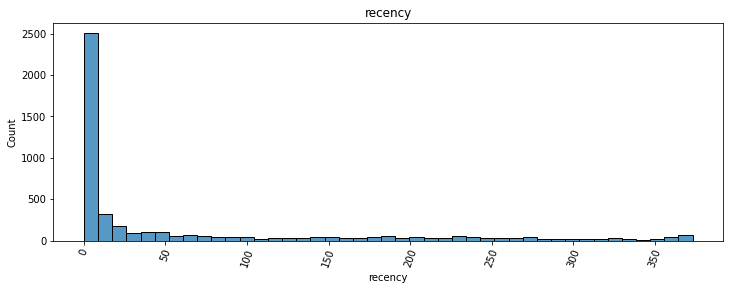

In [34]:
rfm_products_histograms('recency')

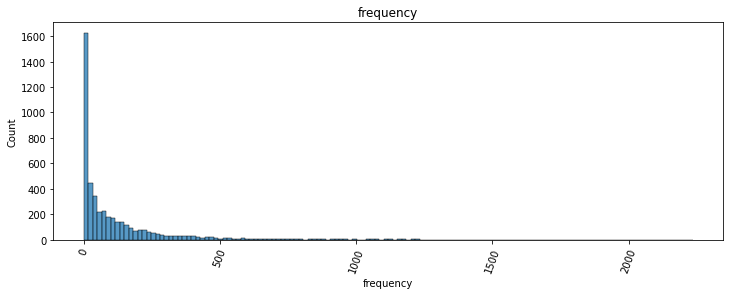

In [35]:
rfm_products_histograms('frequency')

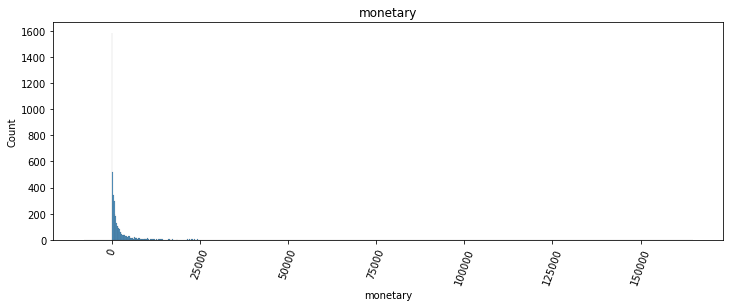

In [36]:
rfm_products_histograms('monetary')

In [37]:
# Categorizing the RFM values

pd.set_option('mode.chained_assignment', None)

rfm_products['R'] = pd.qcut(rfm_products.recency, q=3, labels=["good", "medium", "bad"])
rfm_products['F'] = pd.qcut(rfm_products.frequency, q=3, labels=["bad", "medium", "good"])
rfm_products['M'] = pd.qcut(rfm_products.monetary, q=3, labels=["bad", "medium", "good"])



In [38]:
rfm_products

,stockcode,description,recency,frequency,monetary,R,F,M
0,10002,INFLATABLE POLITICAL GLOBE,235,71,759.890,bad,medium,medium
1,10080,GROOVY CACTUS INFLATABLE,18,22,119.090,medium,medium,bad
3,10120,DOGGY RUBBER,5,29,40.530,medium,medium,bad
4,10123C,HEARTS WRAPPING TAPE,253,3,3.250,bad,bad,bad
5,10124A,SPOTS ON RED BOOKCOVER TAPE,33,5,6.720,bad,bad,bad
...,...,...,...,...,...,...,...,...
4782,PADS,PADS TO MATCH ALL CUSHIONS,75,4,0.003,bad,bad,bad
4784,S,SAMPLES,21,19,-3049.390,medium,medium,bad
4786,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,39,9,167.050,bad,bad,medium
4787,gift_0001_20,to push order througha s stock was,176,1,0.000,bad,bad,bad


In [39]:
# Investigating which products go to which categories
# RECENCY

rfm_products[rfm_products['R']=='good'].describe()

,recency,frequency,monetary
count,1835.000000,1835.000000,1835.000000
mean,0.410899,224.791281,4309.334747
std,0.492131,238.925778,8353.428848
min,0.000000,1.000000,0.000000
25%,0.000000,74.000000,678.685000
50%,0.000000,151.000000,1706.880000
75%,1.000000,283.500000,4561.410000
max,1.000000,2235.000000,164762.190000


In [40]:
rfm_products[rfm_products['R']=='medium'].describe()

,recency,frequency,monetary
count,1231.000000,1231.000000,1231.000000
mean,10.203087,64.928513,1016.032625
std,8.350708,87.563959,2153.472912
min,2.000000,1.000000,-7933.430000
25%,3.000000,12.000000,75.700000
50%,7.000000,33.000000,342.760000
75%,15.000000,87.000000,1014.450000
max,31.000000,766.000000,26247.830000


In [41]:
rfm_products[rfm_products['R']=='bad'].describe()

,recency,frequency,monetary
count,1528.000000,1528.000000,1528.000000
mean,172.861911,22.657068,404.325519
std,103.141626,52.035240,1594.690792
min,32.000000,1.000000,-54.000000
25%,74.750000,1.000000,0.925000
50%,165.500000,4.000000,32.835000
75%,248.250000,19.000000,217.267500
max,373.000000,603.000000,39619.500000


In [42]:
# Investigating which products go to which categories
# FREQUENCY

rfm_products[rfm_products['F']=='good'].describe()

,recency,frequency,monetary
count,1526.000000,1526.000000,1526.000000
mean,6.787680,290.957405,5652.478696
std,27.188296,233.172791,8905.935103
min,0.000000,103.000000,134.830000
25%,0.000000,145.000000,1525.410000
50%,0.000000,213.000000,2924.350000
75%,1.000000,353.750000,6435.577500
max,275.000000,2235.000000,164762.190000


In [43]:
rfm_products[rfm_products['F']=='medium'].describe()

,recency,frequency,monetary
count,1512.000000,1512.000000,1512.000000
mean,36.939153,50.334656,672.296442
std,71.380545,25.349087,858.590698
min,0.000000,16.000000,-7933.430000
25%,1.000000,28.000000,230.527500
50%,4.000000,45.000000,469.950000
75%,25.000000,71.000000,840.575000
max,371.000000,102.000000,6457.150000


In [44]:
rfm_products[rfm_products['F']=='bad'].describe()

,recency,frequency,monetary
count,1556.000000,1556.000000,1556.000000
mean,135.756427,4.455013,86.105465
std,120.239361,4.199973,1026.617051
min,0.000000,1.000000,-54.000000
25%,23.750000,1.000000,0.000000
50%,98.000000,2.000000,16.790000
75%,234.000000,7.000000,58.827500
max,373.000000,15.000000,39619.500000


In [45]:
# Investigating which products go to which categories
# MONETARY

rfm_products[rfm_products['M']=='good'].describe()

,recency,frequency,monetary
count,1531.000000,1531.000000,1531.000000
mean,10.529066,279.340954,5862.053416
std,36.973895,241.057721,8851.323044
min,0.000000,2.000000,1119.220000
25%,0.000000,130.000000,1817.585000
50%,1.000000,208.000000,3151.630000
75%,2.000000,352.500000,6436.225000
max,327.000000,2235.000000,164762.190000


In [46]:
rfm_products[rfm_products['M']=='medium'].describe()

,recency,frequency,monetary
count,1531.000000,1531.00000,1531.000000
mean,41.663619,58.96081,509.372260
std,79.394991,45.13897,284.633578
min,0.000000,1.00000,123.470000
25%,1.000000,26.00000,255.770000
50%,4.000000,46.00000,466.530000
75%,30.000000,80.00000,730.895000
max,372.000000,291.00000,1116.890000


In [47]:
rfm_products[rfm_products['M']=='bad'].describe()

,recency,frequency,monetary
count,1532.000000,1532.000000,1532.000000
mean,128.942559,5.939295,14.048371
std,120.099646,7.778756,322.326553
min,0.000000,1.000000,-7933.430000
25%,18.000000,1.000000,0.000000
50%,87.000000,2.000000,15.795000
75%,227.000000,8.000000,49.840000
max,373.000000,65.000000,123.300000


**Recency**

- There are more products with good recency than there are with medium or bad recency, which is good. It means products are ordering most of products recently.
- 'Good' recency is considered products with an average of 0.41 days of recency, an average of 224 frequency of order, and an average of 4307 monetary value
- 'Bad' recency products have a recency of 170 days on average,	a average frequency of 20 orders, and an average monetary value of 361
- This tells us that more recently ordered products have higher prices and are more frequently ordered 

**Frequency** 
- Products with high frequency have an average recency of 7 days, average frequency of 283 orders, and average monetary value of 5491 
- Products with low frequency have an average recency of 130, an average frequency of 3 orders, and average monetary value of 69
- This means that products that get ordered more often have higher monetary value than products that get ordered less often

**Monetary** 
- Products with good monetary values have an average recency of 10, average frequency of 272, and average monetary value of 5670 
- Products with bad monetary values have an average recency of 124 days of order, and average frequency of 4, and an average monetary value of 5
- This means that products that were ordered more recently generally have better monetary value, and were ordered more frequently 

#### Investigating relationships between products' RFM values and their prices

In [48]:
# Defining as 'best' products with all-'good' RFM values

bestproducts = rfm_products[ (rfm_products['R'] == 'good') & (rfm_products['F'] == 'good') & (rfm_products['M'] == 'good')]
bestproducts = bestproducts.merge(data[['stockcode', 'unitprice']], on='stockcode')
bestproducts

,stockcode,description,recency,frequency,monetary,R,F,M,unitprice
0,10135,COLOURING PENCILS BROWN TUBE,1,176,2206.14,good,good,good,2.51
1,10135,COLOURING PENCILS BROWN TUBE,1,176,2206.14,good,good,good,1.25
2,10135,COLOURING PENCILS BROWN TUBE,1,176,2206.14,good,good,good,2.51
3,10135,COLOURING PENCILS BROWN TUBE,1,176,2206.14,good,good,good,1.25
4,10135,COLOURING PENCILS BROWN TUBE,1,176,2206.14,good,good,good,1.25
...,...,...,...,...,...,...,...,...,...
368899,85227,SET OF 6 3D KIT CARDS FOR KIDS,0,223,1368.75,good,good,good,0.85
368900,85227,SET OF 6 3D KIT CARDS FOR KIDS,0,223,1368.75,good,good,good,1.63
368901,85227,SET OF 6 3D KIT CARDS FOR KIDS,0,223,1368.75,good,good,good,1.63
368902,85227,SET OF 6 3D KIT CARDS FOR KIDS,0,223,1368.75,good,good,good,1.63


In [49]:
# Investigating the best products with 0 cancellations

bestproducts_no_cancells = bestproducts[~bestproducts['stockcode'].isin(cancelled['stockcode'])]
bestproducts_no_cancells.groupby(['stockcode'])['description'].first().reset_index()

,stockcode,description
0,20668,DISCO BALL CHRISTMAS DECORATION
1,20828,GLITTER BUTTERFLY CLIPS
2,20963,APPLE BATH SPONGE
3,20992,JAZZ HEARTS PURSE NOTEBOOK
4,21070,VINTAGE BILLBOARD MUG
...,...,...
112,85034B,3 WHITE CHOC MORRIS BOXED CANDLES
113,85038,6 CHOCOLATE LOVE HEART T-LIGHTS
114,85039B,S/4 IVORY MINI ROSE CANDLE IN BOWL
115,85049C,ROMANTIC PINKS RIBBONS


In [50]:
# Defining as 'worst' products with all-'bad' RFM values

worstproducts = rfm_products[ (rfm_products['R'] == 'bad') | (rfm_products['R'] == 'medium') & (rfm_products['F'] == 'bad') | (rfm_products['F'] == 'medium') & (rfm_products['M'] == 'bad') | (rfm_products['M'] == 'medium')]
worstproducts = worstproducts.merge(data[['stockcode', 'unitprice']], on='stockcode')
worstproducts

,stockcode,description,recency,frequency,monetary,R,F,M,unitprice
0,10002,INFLATABLE POLITICAL GLOBE,235,71,759.89,bad,medium,medium,0.85
1,10002,INFLATABLE POLITICAL GLOBE,235,71,759.89,bad,medium,medium,0.85
2,10002,INFLATABLE POLITICAL GLOBE,235,71,759.89,bad,medium,medium,0.85
3,10002,INFLATABLE POLITICAL GLOBE,235,71,759.89,bad,medium,medium,0.85
4,10002,INFLATABLE POLITICAL GLOBE,235,71,759.89,bad,medium,medium,1.66
...,...,...,...,...,...,...,...,...,...
248796,gift_0001_20,to push order througha s stock was,176,1,0.00,bad,bad,bad,16.67
248797,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,162,4,167.56,bad,bad,medium,42.55
248798,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,162,4,167.56,bad,bad,medium,41.67
248799,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,162,4,167.56,bad,bad,medium,41.67


In [51]:
# Checking products with low RFM values that have been cancelled

worst_cancelled = worstproducts[worstproducts['stockcode'].isin(cancelled['stockcode'])]
worst_cancelled.groupby(['stockcode'])['description'].first().reset_index()

,stockcode,description
0,10002,INFLATABLE POLITICAL GLOBE
1,10123C,HEARTS WRAPPING TAPE
2,10133,COLOURING PENCILS BROWN TUBE
3,15034,PAPER POCKET TRAVELING FAN
4,15044B,BLUE PAPER PARASOL
...,...,...
1448,DCGS0068,ebay
1449,DCGS0069,OOH LA LA DOGS COLLAR
1450,DCGS0070,CAMOUFLAGE DOG COLLAR
1451,DCGS0073,ebay


**Client Recommendations** 

- Remove from the inventory all the cancelled products with all-low RFM values (worst_cancelled), that had more than the average 97 cancellations 

- Promote the products with all-high RFM values that haven't had any cancellations (bestproducts_no_cancellations) 




### Seasonality Analysis

In [52]:
data['date'] = data['invoicedate'].dt.normalize()

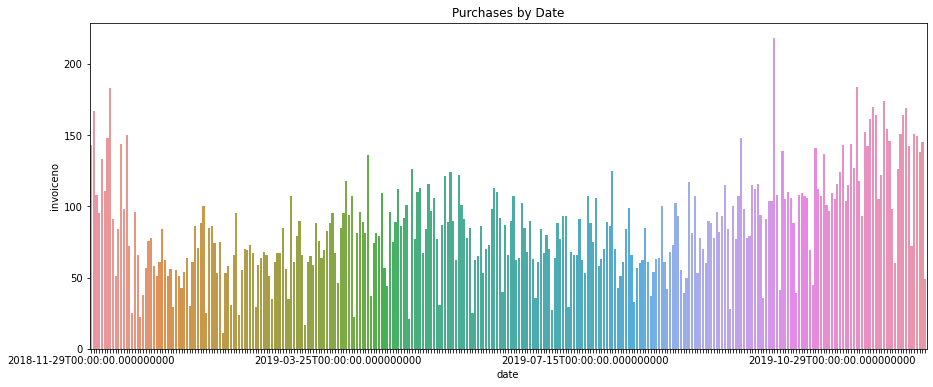

In [53]:
invoice_by_date = data.groupby('date')['invoiceno'].nunique().reset_index()
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='date', y='invoiceno', data=invoice_by_date)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 90 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)
        
plt.title("Purchases by Date") 
plt.show()

In [54]:
invoice_by_date['invoiceno'].max()
invoice_by_date[invoice_by_date['invoiceno']==218]

,date,invoiceno
249,2019-10-04,218


- There seems to be seasonality, we see sales growth from September onwards, December being the highest month and continuing growth until January
- There is a big peak on 2019/10/04 which is worth investigating

In [55]:
# Investigating the invoices on peak date 2019-10-04

peak_date = data[data['date']=='2019-10-04']
peak_date.groupby(['invoiceno'])['stockcode'].count().sort_values(ascending=False).reset_index()

,invoiceno,stockcode
0,569898,254
1,569897,239
2,569866,182
3,569846,127
4,569843,104
...,...,...
213,569930,1
214,569929,1
215,569928,1
216,569927,1


In [56]:
# Investigating the invoices from peak date 2019-10-04 and looking for connections between rfm_products and items sold 

peak_date = peak_date.merge(rfm_products[['stockcode', 'R', 'F', 'M']], on='stockcode')
peak_date_rfm = peak_date.groupby(['stockcode', 'R', 'F', 'M'])['description'].count().sort_values(ascending=False).reset_index()
peak_date_rfm

,stockcode,R,F,M,description
0,20713,bad,bad,bad,63
1,23343,bad,bad,bad,56
2,23209,bad,bad,bad,34
3,22734,bad,bad,bad,24
4,22423,bad,bad,bad,22
...,...,...,...,...,...
35473,22375,bad,good,good,0
35474,22375,bad,good,medium,0
35475,22375,bad,good,bad,0
35476,22375,bad,medium,good,0


In [57]:
peak_date_rfm['R'].value_counts()

good      11826
medium    11826
bad       11826
Name: R, dtype: int64

In [58]:
peak_date_rfm['F'].value_counts()

bad       11826
medium    11826
good      11826
Name: F, dtype: int64

In [59]:
peak_date_rfm['M'].value_counts()

bad       11826
medium    11826
good      11826
Name: M, dtype: int64

- Looks like products sold on the peak date were split equally between RFM 

In [60]:
peak_date_rfm[ (peak_date_rfm['R']=='bad') | (peak_date_rfm['F']=='bad') | (peak_date_rfm['M']=='bad')]

,stockcode,R,F,M,description
0,20713,bad,bad,bad,63
1,23343,bad,bad,bad,56
2,23209,bad,bad,bad,34
3,22734,bad,bad,bad,24
4,22423,bad,bad,bad,22
...,...,...,...,...,...
35473,22375,bad,good,good,0
35474,22375,bad,good,medium,0
35475,22375,bad,good,bad,0
35476,22375,bad,medium,good,0


In [61]:
good_rfm_peak_date = peak_date_rfm[ (peak_date_rfm['R']=='good') & (peak_date_rfm['F']=='good') & (peak_date_rfm['M']=='good')]
good_rfm_peak_date

,stockcode,R,F,M,description
5,85099B,good,good,good,18
6,23209,good,good,good,17
10,23203,good,good,good,15
11,84879,good,good,good,15
13,22720,good,good,good,14
...,...,...,...,...,...
34924,22336,good,good,good,0
35086,22393,good,good,good,0
35128,22395,good,good,good,0
35176,22389,good,good,good,0


In [62]:
data['month'] = data['invoicedate'].dt.month

In [63]:
# Investigating the invoices from peak months (January, October, November, December) 
# and looking for connections between rfm_products and items sold 

peak_months = data[ (data['month']==1) | (data['month']==10) | (data['month']==11) | (data['month']==12)]
peak_months = peak_months.merge(rfm_products[['stockcode', 'R', 'F', 'M']], on='stockcode')
good_rfm_peak_months = peak_months[ (peak_months['R']=='good') & (peak_months['F']=='good') & (peak_months['M']=='good')]
good_rfm_peak_months

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue,date,month,R,F,M
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0,15.30,2018-11-29,11,good,good,good
6,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 09:02:00,2.55,17850.0,15.30,2018-11-29,11,good,good,good
10,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 09:32:00,2.55,17850.0,15.30,2018-11-29,11,good,good,good
14,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2018-11-29 10:19:00,2.55,17511.0,163.20,2018-11-29,11,good,good,good
18,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2018-11-29 10:39:00,2.55,13408.0,81.60,2018-11-29,11,good,good,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
311792,581415,23552,BICYCLE PUNCTURE REPAIR KIT,6,2019-12-06 14:53:00,2.08,13269.0,12.48,2019-12-06,12,good,good,good
311793,581439,23552,BICYCLE PUNCTURE REPAIR KIT,7,2019-12-06 16:30:00,4.13,NaN,28.91,2019-12-06,12,good,good,good
311794,581454,23552,BICYCLE PUNCTURE REPAIR KIT,6,2019-12-06 18:22:00,2.08,15156.0,12.48,2019-12-06,12,good,good,good
311795,581492,23552,BICYCLE PUNCTURE REPAIR KIT,12,2019-12-07 10:03:00,4.13,NaN,49.56,2019-12-07,12,good,good,good


In [64]:
# Getting list of'good RFM' with no cancellations

good_rfm_peak_months = good_rfm_peak_months[~good_rfm_peak_months['stockcode'].isin(cancelled['stockcode'])]
good_rfm_peak_months

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,revenue,date,month,R,F,M
7475,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,2018-11-29 08:34:00,3.75,13047.0,30.00,2018-11-29,11,good,good,good
7476,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,2,2018-11-29 11:49:00,3.75,17920.0,7.50,2018-11-29,11,good,good,good
7477,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,2018-11-29 11:49:00,3.75,17920.0,3.75,2018-11-29,11,good,good,good
7478,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,2018-11-29 11:49:00,3.75,17920.0,3.75,2018-11-29,11,good,good,good
7479,536415,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,2,2018-11-29 11:57:00,3.75,12838.0,7.50,2018-11-29,11,good,good,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
311792,581415,23552,BICYCLE PUNCTURE REPAIR KIT,6,2019-12-06 14:53:00,2.08,13269.0,12.48,2019-12-06,12,good,good,good
311793,581439,23552,BICYCLE PUNCTURE REPAIR KIT,7,2019-12-06 16:30:00,4.13,NaN,28.91,2019-12-06,12,good,good,good
311794,581454,23552,BICYCLE PUNCTURE REPAIR KIT,6,2019-12-06 18:22:00,2.08,15156.0,12.48,2019-12-06,12,good,good,good
311795,581492,23552,BICYCLE PUNCTURE REPAIR KIT,12,2019-12-07 10:03:00,4.13,NaN,49.56,2019-12-07,12,good,good,good


### Hypotheses Testing

In [65]:
sample_data = data[['customerid','stockcode']].merge(rfm_clients[['customerid', 'segment']], on='customerid')
sample_data = sample_data.merge(rfm_products[['stockcode','R', 'F', 'M']], on='stockcode')
sample_data = sample_data.rename(columns = {'segment':'client_segment', 'R':'product_R', 'F':'product_F', 'M':'product_M'})
sample_data

,customerid,stockcode,client_segment,product_R,product_F,product_M
0,17850.0,85123A,7,bad,bad,bad
1,17850.0,85123A,7,good,bad,medium
2,17850.0,85123A,7,good,good,good
3,17850.0,85123A,7,medium,bad,bad
4,17850.0,85123A,7,bad,bad,bad
...,...,...,...,...,...,...
517267,13790.0,90214O,5,medium,bad,bad
517268,13790.0,90214T,5,medium,bad,bad
517269,13790.0,90214U,5,medium,bad,bad
517270,13790.0,90214W,5,medium,bad,bad


In [66]:
# Separating data by clients' segments to see if the RFM of the products they buy differ

high_segment = sample_data[(sample_data['client_segment']==8)|(sample_data['client_segment']==9)]
medium_segment = sample_data[(sample_data['client_segment']==5)|(sample_data['client_segment']==6)|(sample_data['client_segment']==7)]
low_segment = sample_data[(sample_data['client_segment']==3)|(sample_data['client_segment']==4)|(sample_data['client_segment']==5)]

In [67]:
# Investigating the RFM of products bought by high segment clients 

high_segment_r = high_segment['product_R'].value_counts().reset_index()
high_segment_r['%'] = high_segment_r['product_R']/high_segment_r['product_R'].sum()
high_segment_r.reindex([0,2,1])

,index,product_R,%
0,good,233698,0.643658
2,medium,51594,0.142102
1,bad,77786,0.214240


In [68]:
high_segment_f = high_segment['product_F'].value_counts().reset_index()
high_segment_f['%'] = high_segment_f['product_F']/high_segment_f['product_F'].sum()
high_segment_f.reindex([0,2,1])

,index,product_F,%
0,good,254647,0.701356
2,medium,40848,0.112505
1,bad,67583,0.186139


In [69]:
high_segment_m = high_segment['product_M'].value_counts().reset_index()
high_segment_m['%'] = high_segment_m['product_M']/high_segment_m['product_M'].sum()
high_segment_m.reindex([0,2,1])

,index,product_M,%
0,good,251562,0.692859
2,medium,52128,0.143572
1,bad,59388,0.163568


In [70]:
# Investigating the RFM of products bought by medium segment clients 

medium_segment_r = medium_segment['product_R'].value_counts().reset_index()
medium_segment_r['%'] = medium_segment_r['product_R']/medium_segment_r['product_R'].sum()
medium_segment_r.reindex([0,2,1])

,index,product_R,%
0,good,75981,0.637719
2,medium,18669,0.156691
1,bad,24495,0.205590


In [71]:
medium_segment_f = medium_segment['product_F'].value_counts().reset_index()
medium_segment_f['%'] = medium_segment_f['product_F']/medium_segment_f['product_F'].sum()
medium_segment_f.reindex([0,2,1])

,index,product_F,%
0,good,82444,0.691964
2,medium,14804,0.124252
1,bad,21897,0.183784


In [72]:
medium_segment_m = medium_segment['product_M'].value_counts().reset_index()
medium_segment_m['%'] = medium_segment_m['product_M']/medium_segment_m['product_M'].sum()
medium_segment_m.reindex([0,2,1])

,index,product_M,%
0,good,81466,0.683755
2,medium,18393,0.154375
1,bad,19286,0.161870


In [73]:
# Investigating the RFM of products bought by low segment clients 

low_segment_r = low_segment['product_R'].value_counts().reset_index()
low_segment_r['%'] = low_segment_r['product_R']/low_segment_r['product_R'].sum()
low_segment_r.reindex([0,2,1])

,index,product_R,%
0,good,41246,0.623711
2,medium,11113,0.168048
1,bad,13771,0.208241


In [74]:
low_segment_f = low_segment['product_F'].value_counts().reset_index()
low_segment_f['%'] = low_segment_f['product_F']/low_segment_f['product_F'].sum()
low_segment_f.reindex([0,2,1])

,index,product_F,%
0,good,45386,0.686315
2,medium,8776,0.132708
1,bad,11968,0.180977


In [75]:
low_segment_m = low_segment['product_M'].value_counts().reset_index()
low_segment_m['%'] = low_segment_m['product_M']/low_segment_m['product_M'].sum()
low_segment_m.reindex([0,2,1])

,index,product_M,%
0,good,44738,0.676516
2,bad,10601,0.160305
1,medium,10791,0.163179


- It seems that clients from all segments are ordering products with a similar proportion of RFM values

#### Hypothesis 1

- H0: Clients from higher segments buy products with equal recency values than clients from other segments
- H1: Clients from higher segments buy products with different recency values than clients from other segments

In [76]:
sample_data

,customerid,stockcode,client_segment,product_R,product_F,product_M
0,17850.0,85123A,7,bad,bad,bad
1,17850.0,85123A,7,good,bad,medium
2,17850.0,85123A,7,good,good,good
3,17850.0,85123A,7,medium,bad,bad
4,17850.0,85123A,7,bad,bad,bad
...,...,...,...,...,...,...
517267,13790.0,90214O,5,medium,bad,bad
517268,13790.0,90214T,5,medium,bad,bad
517269,13790.0,90214U,5,medium,bad,bad
517270,13790.0,90214W,5,medium,bad,bad


In [77]:
# Counting amount of products that were purchased by client segments, per RFM values. 
# Calculated with a 'count' instead of 'nunique', since clients often purchased the same stockcode more than once
recency_sample = sample_data.pivot_table(index='client_segment', columns='product_R', values='stockcode', aggfunc='count')

def reset_index(recency_sample):     
    index_recency_sample = recency_sample.index.to_frame(index=False)
    recency_sample = recency_sample.reset_index(drop=True)
    return pd.merge(index_recency_sample, recency_sample, left_index=True, right_index=True)



In [78]:
recency_sample = reset_index(recency_sample)
recency_sample

,client_segment,good,medium,bad
0,3,5796,1662,2278
1,4,15578,4370,5365
2,5,19872,5081,6128
3,6,23249,5791,7457
4,7,32860,7797,10910
5,8,62152,14089,20842
6,9,171546,37505,56944


In [79]:
# Calculating bonferroni alpha for 12 tests, 4 per each RFM value

alpha = 0.05
num_of_tests = 12 

fwer = 1 - (1 - alpha)** (num_of_tests)
bonferroni_alpha = alpha/num_of_tests

print('The family-wise error rate (FWER) is:', fwer)
print('The alpha level with Bonferroni correction is: ',bonferroni_alpha)

The family-wise error rate (FWER) is: 0.45963991233736334
The alpha level with Bonferroni correction is:  0.004166666666666667


In [80]:
# Creating function to test all events

def check_hypotheses(table, segment1, segment2, alpha):
    
    success1 = table[table['client_segment']==segment1]['good'].iloc[0]
    success2 = table[table['client_segment']==segment2]['good'].iloc[0]
    
    trials1 = sample_data[sample_data['client_segment']==segment1]['stockcode'].count()
    trials2 = sample_data[sample_data['client_segment']==segment2]['stockcode'].count()
    
    p1 = success1/trials1
    p2 = success2/trials2
    
    p_combined = (success1 + success2) / (trials1 + trials2)
    difference = p1 - p2
    
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    
    distr = st.norm(0, 1)  
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('p-value:', p_value)
    
    if (p_value < alpha):
        print("Rejecting the null hypothesis: Clients from segment", segment1, "and segment", segment2, "seem to be statistically different")
    else:
        print("Failed to reject the null hypothesis: Clients from segment", segment1, "and segment", segment2, "seem to be statistically equal") 
              
              

In [81]:
# Testing hypotheses on segments 3 and 9 (lowest and highest segments)

check_hypotheses(recency_sample,3,9,bonferroni_alpha)

p-value: 0.0
Rejecting the null hypothesis: Clients from segment 3 and segment 9 seem to be statistically different


In [82]:
# Testing hypotheses on segments 3 and 8

check_hypotheses(recency_sample,3,8,bonferroni_alpha)

p-value: 0.0
Rejecting the null hypothesis: Clients from segment 3 and segment 8 seem to be statistically different


In [83]:
# Testing hypotheses on segments 4 and 9

check_hypotheses(recency_sample,4,9,bonferroni_alpha)

p-value: 0.0
Rejecting the null hypothesis: Clients from segment 4 and segment 9 seem to be statistically different


In [84]:
# Testing hypotheses on segments 4 and 8

check_hypotheses(recency_sample,4,8,bonferroni_alpha)

p-value: 3.019806626980426e-13
Rejecting the null hypothesis: Clients from segment 4 and segment 8 seem to be statistically different


- Seems that product's recency values variate between clients in lower and higher segments

In [85]:
frequency_sample = sample_data.pivot_table(index='client_segment', columns='product_F', values='stockcode', aggfunc='count')

def reset_index(frequency_sample):     
    index_frequency_sample = frequency_sample.index.to_frame(index=False)
    frequency_sample = frequency_sample.reset_index(drop=True)
    return pd.merge(index_frequency_sample, frequency_sample, left_index=True, right_index=True)


In [86]:
frequency_sample = reset_index(frequency_sample)
frequency_sample

,client_segment,bad,medium,good
0,3,1848,1329,6559
1,4,4592,3370,17351
2,5,5528,4077,21476
3,6,6811,4653,25033
4,7,9558,6074,35935
5,8,18247,10841,67995
6,9,49336,30007,186652


#### Hypothesis 2

- H0: Clients from higher segments buy products with equal frequency values than clients from other segments
- H1: Clients from higher segments buy products with different frequency values than clients from other segments

In [87]:
# Testing hypotheses on segments 3 and 9 (lowest and highest segments)

check_hypotheses(frequency_sample,3,9,bonferroni_alpha)

p-value: 3.004635873438133e-09
Rejecting the null hypothesis: Clients from segment 3 and segment 9 seem to be statistically different


In [88]:
# Testing hypotheses on segments 3 and 8

check_hypotheses(frequency_sample,3,8,bonferroni_alpha)

p-value: 4.524693886232001e-08
Rejecting the null hypothesis: Clients from segment 3 and segment 8 seem to be statistically different


In [89]:
# Testing hypotheses on segments 4 and 9

check_hypotheses(frequency_sample,4,9,bonferroni_alpha)

p-value: 6.887667347577064e-08
Rejecting the null hypothesis: Clients from segment 4 and segment 9 seem to be statistically different


In [90]:
# Testing hypotheses on segments 4 and 8

check_hypotheses(frequency_sample,4,8,bonferroni_alpha)

p-value: 4.179766809775387e-06
Rejecting the null hypothesis: Clients from segment 4 and segment 8 seem to be statistically different


- Seems that product's frequency values variate between clients in lower and higher segments

#### Hypothesis 3

- H0: Clients from higher segments buy products with equal monetary values than clients from other segments
- H1: Clients from higher segments buy products with different monetary values than clients from other segments

In [91]:
monetary_sample = sample_data.pivot_table(index='client_segment', columns='product_M', values='stockcode', aggfunc='count')

def reset_index(monetary_sample):     
    index_monetary_sample = monetary_sample.index.to_frame(index=False)
    monetary_sample = monetary_sample.reset_index(drop=True)
    return pd.merge(index_monetary_sample, monetary_sample, left_index=True, right_index=True)

In [92]:
monetary_sample = reset_index(monetary_sample)
monetary_sample

,client_segment,bad,medium,good
0,3,1661,1592,6483
1,4,4125,4098,17090
2,5,4815,5101,21165
3,6,6054,5679,24764
4,7,8417,7613,35537
5,8,16033,13515,67535
6,9,43355,38613,184027


In [93]:
# Testing hypotheses on segments 3 and 9 (lowest and highest segments)

check_hypotheses(monetary_sample,3,9,bonferroni_alpha)

p-value: 5.1726222194403704e-08
Rejecting the null hypothesis: Clients from segment 3 and segment 9 seem to be statistically different


In [94]:
# Testing hypotheses on segments 3 and 8

check_hypotheses(monetary_sample,3,8,bonferroni_alpha)

p-value: 1.283897654857924e-09
Rejecting the null hypothesis: Clients from segment 3 and segment 8 seem to be statistically different


In [95]:
# Testing hypotheses on segments 4 and 9

check_hypotheses(monetary_sample,4,9,bonferroni_alpha)

p-value: 4.008883580652878e-08
Rejecting the null hypothesis: Clients from segment 4 and segment 9 seem to be statistically different


In [96]:
# Testing hypotheses on segments 4 and 8

check_hypotheses(monetary_sample,4,8,bonferroni_alpha)

p-value: 3.2375369052317637e-10
Rejecting the null hypothesis: Clients from segment 4 and segment 8 seem to be statistically different


- Seems that product's frequency values variate between clients in lower and higher segments

**Conclusions**

- Clients have been separated into segments from 3-9, depending on their RFM values: 3 is the lowest segment, and 9 is the highest.

- From this, we created the hypotheses that clients from higher segments buy products with different RFM values than clients from lower segments

- It was found that product's RFM seem to variate between client segments: high segment clients purchased products with different recency and frequency values than low segment clients did

- Monetary values do not variate between clients in segments 4 and 9, and 4 and 8. Other segments seem to have different purchasing behavior monetary-wise

**Project Findings** 

RECENCY
- More recently ordered products have higher prices and are more frequently ordered 

FREQUENCY
- Products that get ordered more often have higher monetary value than products that get ordered less often

MONETARY
- Products that were ordered more recently generally have better monetary value, and were ordered more frequently 

**Which tells us that good products generally have an all-'good' rating in all RFM values**

**Client Recommendations** 

- It seems that segments 3, 6 and 9 are responsible for the majority of cancellations, so this problem needs to be tackled within each client segment specifically

- Consider removing from inventory products with all 'bad' RFM values, and eemove from inventory all the cancelled products with all-low RFM values (worst_cancelled), that had more than the average 97 cancellations

- Promote the products with all-high RFM values that haven't had any cancellations (bestproducts_no_cancellations)

- Based on our statistical test findings, marketing campaigns should be based on clients' segments. For example, the company could promote products with higher RFM values to lower client segments in order to improve performance.




